# Explore here

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn import tree

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data = total_data[["MedInc", "Latitude", "Longitude"]]
data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [5]:
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)

 - Método del Codo para determinar el número óptimo de clústeres en los datos de entrenamiento X_train.

In [6]:
k_values = range(1, 21)
variance_explained = []

for k in k_values:                  # bucle sobre diferentes valores de k, que van desde 1 hasta 10 en este caso. Para cada valor de k:
    kmeans = KMeans(n_clusters=k, random_state=0)   # objeto KMeans con el número de clústeres dado por k
    kmeans.fit(X_train)                             # El modelo KMeans se ajusta utilizando los datos de entrenamiento (X_train)
    variance_explained.append(kmeans.inertia_)      # Suma de distancias al cuadrado de las muestras al centro del clúster más cercano
                                                    # que se conoce como la inercia del modelo, y se almacena en la lista variance_explained

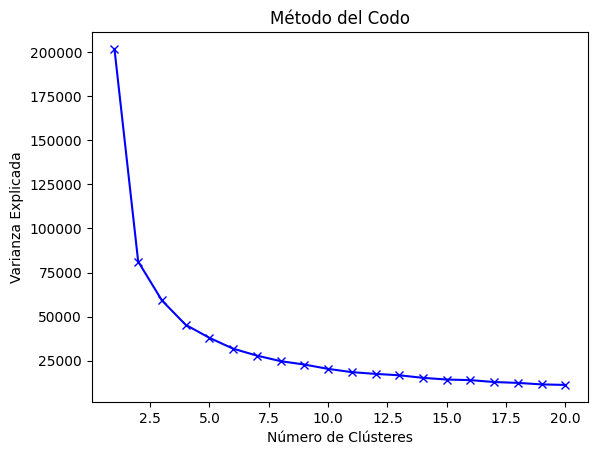

In [7]:
# Gráfico que muestra el número de clústeres en el eje x y la varianza explicada en el eje y.
# Esto nos ayuda a identificar el "codo" en la curva, que indica el número óptimo de clústeres

# Graficamos la varianza explicada vs. número de clústeres
plt.plot(k_values, variance_explained, 'bx-')
plt.xlabel('Número de Clústeres')
plt.ylabel('Varianza Explicada')
plt.title('Método del Codo')
plt.show()

 - Modelo aprendizaje no supervisado

In [8]:
model_k = KMeans(n_clusters = 8, n_init = "auto", random_state = 42)
model_k.fit(X_train)

KMeans(random_state=42)

In [9]:
y_train = list(model_k.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,6
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,6


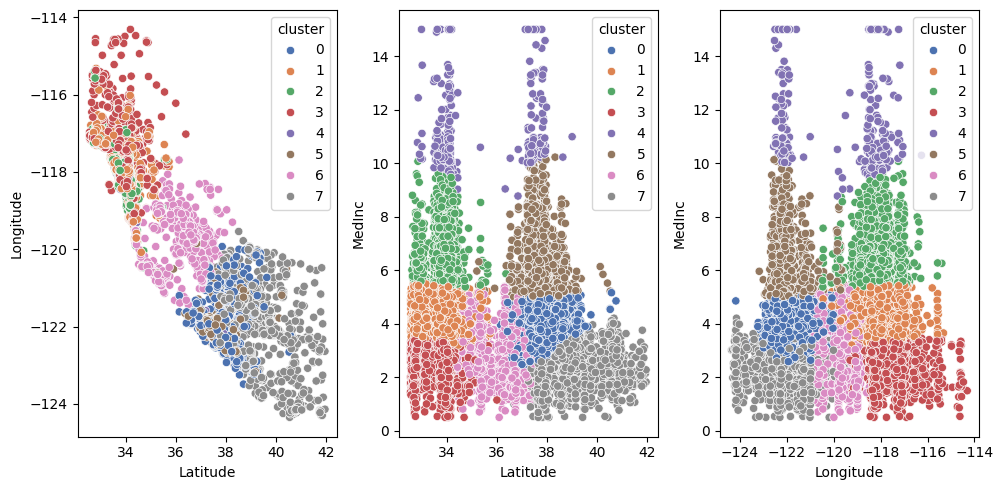

In [10]:
fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [11]:
y_test = list(model_k.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,6
3024,2.5313,35.14,-119.46,6
15663,3.4801,37.80,-122.44,0
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,0


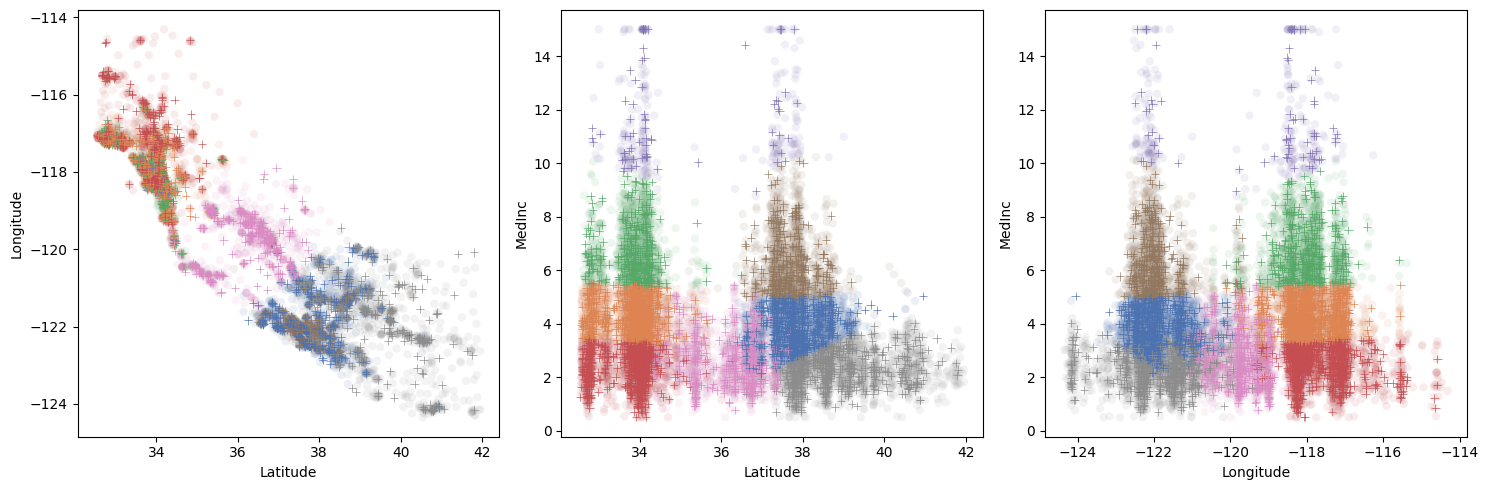

In [12]:
# gráfico de dispersión dividido en tres subgráficos para visualizar la relación entre las variables "Latitude", "Longitude" y "MedInc",
# coloreando los puntos de datos según los clústeres asignados por el modelo de agrupamiento y agregando marcadores + para los datos de prueba.

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

Después de ajustar el modelo KMeans de aprendizaje no supervisado, se puede evaluar su rendimiento utilizando métricas específicas para la agrupación. Algunas de las métricas comunes para evaluar la calidad de los clústeres son la inercia y el coeficiente de silueta.

 1. Inercia:
La inercia mide la suma de las distancias al cuadrado de las muestras al centro de su clúster más cercano. Cuanto menor sea la inercia, más compactos y mejor definidos estarán los clústeres. Puedes obtener la inercia utilizando el atributo inertia_ del modelo KMeans. Sin embargo, ten en cuenta que la inercia por sí sola no es suficiente para determinar el número óptimo de clústeres.

In [13]:
inercia = model_k.inertia_
inercia

# Una inercia más baja indica que los puntos de datos están más cerca de los centroides de sus clústeres,
# lo que sugiere una mejor separación de los clústeres. Por lo tanto, se prefiere una inercia más baja.
# En este caso, una inercia de aproximadamente 81209.97 (2 clusters) indica que la dispersión de los puntos de datos dentro de los clústeres es moderada.

24869.896599541084

 2. Coeficiente de silueta:
El coeficiente de silueta es una medida de cuán similar es un objeto a su propio clúster (cohesión) en comparación con otros clústeres (separación). El valor del coeficiente de silueta varía entre -1 y 1. Un valor alto indica que el objeto está bien emparejado con su propio clúster y mal emparejado con clústeres vecinos. Puedes calcular el coeficiente de silueta utilizando la función silhouette_score de sklearn.metrics.

In [14]:
silueta = silhouette_score(X_train, model_k.labels_)
silueta

# Una puntuación de silueta cercana a 1 indica que los puntos están bien agrupados, con una buena separación entre clústeres.
# Una puntuación de silueta cercana a 0 indica que los puntos están cerca del límite entre dos clústeres.
# Una puntuación negativa indica que esos puntos pueden haber sido asignados al clúster incorrecto.
# En este caso, una puntuación de silueta de aproximadamente 0.57 (2 clusters) indica que los clústeres están bien definidos y separados entre sí.

0.569280961438727

2 clusters:
 - inercia = 83376.0446837554
 - silueta = 0.572325441197461

3 clusters:
 - inercia = 59155.53313360495
 - silueta = 0.5283533036327491

Con la nueva inercia de aproximadamente 59155.53 y una puntuación de silueta de alrededor de 0.53, podemos interpretar lo siguiente:

Inercia (Inertia): La disminución en la inercia (en comparación con el valor anterior) sugiere que los clústeres están más compactos y cohesionados. Esto indica que los puntos de datos dentro de cada clúster están más cerca de su respectivo centroide, lo que resulta en una mejor agrupación de los datos.

Puntuación de la Silueta (Silhouette Score): La disminución en la puntuación de silueta (en comparación con el valor anterior) indica que, aunque los clústeres están más cohesionados, la separación entre los clústeres puede no ser tan clara como antes. Esto sugiere que algunos puntos de datos pueden estar más cerca del límite entre dos clústeres, lo que reduce ligeramente la calidad de la agrupación en comparación con la iteración anterior.

En resumen, aunque la inercia ha disminuido, lo que indica una mejor agrupación interna de los datos, la ligera disminución en la puntuación de silueta sugiere que la separación entre los clústeres puede no ser tan distintiva como antes. Es importante considerar un equilibrio entre la cohesión dentro de los clústeres y la separación entre ellos para obtener una agrupación óptima.

4 clusters:
- inercia = 46393.851102220346
- silueta = 0.5198017450486693

6 clusters:
 - inercia = 34860.44280741844
 - silueta = 0.5362590486820171

8 clusters:
 - inercia = 25450.951942763953
 - silueta = 0.5649357742340334

15 clusters:
 - inercia = 14588.587856997392
 - silueta = 0.6537295442307672

El incremento en el número de clústeres puede tener varios efectos en el resultado del clustering:

Mayor granularidad en la segmentación: Con un mayor número de clústeres, es más probable que se capturen diferencias sutiles en los datos, lo que puede resultar en una segmentación más detallada y específica.

Riesgo de sobreajuste: Si se utilizan demasiados clústeres, existe el riesgo de sobreajustar el modelo a los datos de entrenamiento, lo que puede resultar en clústeres poco útiles o incluso en la captura de ruido en los datos.

Interpretación y utilidad: A medida que aumenta el número de clústeres, puede volverse más difícil interpretar y utilizar los resultados del clustering, especialmente si se convierten en grupos muy pequeños y específicos que no tienen un significado claro.

Por lo tanto, la elección del número óptimo de clústeres debe equilibrar estos efectos. Si bien las métricas de inercia y silueta son útiles para evaluar el rendimiento del clustering, no deben ser las únicas consideraciones. Es importante también considerar la interpretabilidad de los clústeres y cómo se utilizarán en el contexto del problema específico que estás abordando.

- Modelo aprendizaje supervisado

In [15]:
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,6
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,6


In [16]:
y_train = X_train['cluster']
X_train = X_train.drop(['cluster'], axis=1)

y_test = X_test['cluster']
X_test = X_test.drop(['cluster'], axis=1)

In [17]:
model_rf = RandomForestClassifier(n_estimators=5, max_depth=5, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1, min_samples_leaf=20,
                       n_estimators=5, random_state=42)

In [18]:
train_pred = model_rf.predict(X_train)
test_pred = model_rf.predict(X_test)

In [19]:
# Funcion para obtener las métricas cuando la variable objetivo es multiclase

def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_precision, train_recall],
                               [test_accuracy, test_f1, test_precision, test_recall],
                               [diff_accuracy, diff_f1, diff_precision, diff_recall]],
                              columns=['Accuracy', 'F1', 'Precision', 'Recall'],
                              index=['Train', 'Test', 'Diferencia'])
    return metrics_df

get_metrics(y_train, y_test, train_pred, test_pred)

,Accuracy,F1,Precision,Recall
Train,0.955850,0.948520,0.957714,0.955850
Test,0.950339,0.943319,0.952449,0.950339
Diferencia,0.005511,0.005201,0.005265,0.005511


In [20]:
# Obtener las probabilidades de pertenencia a cada clase para cada instancia de entrenamiento
train_probs = model_rf.predict_proba(X_train)

# Calcular el ROC AUC utilizando las probabilidades
train_auc = roc_auc_score(y_train, train_probs, multi_class='ovr')
train_auc

0.9948415052567

In [21]:
test_probs = model_rf.predict_proba(X_test)

# Calcular el ROC AUC utilizando las probabilidades
test_auc = roc_auc_score(y_test, test_probs, multi_class='ovr')
test_auc

0.9935629089914362

In [22]:
diff_auc = train_auc - test_auc
diff_auc

0.0012785962652638316

 - Accuracy (Exactitud):
La exactitud es la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones.
Para el conjunto de entrenamiento, es del 95.59%, lo que significa que el 95.59% de las instancias de entrenamiento fueron clasificadas correctamente por el modelo.
Para el conjunto de prueba, es del 95.03%, lo que indica que el 95.03% de las instancias de prueba fueron clasificadas correctamente por el modelo.
En general, una alta exactitud indica que el modelo está haciendo buenas predicciones en términos generales.

 - F1 Score:
El puntaje F1 es una medida que combina precisión y exhaustividad (recall) en una sola métrica. Es especialmente útil cuando hay un desequilibrio entre las clases.
Para el conjunto de entrenamiento, es del 94.85%. Esto indica un buen equilibrio entre precisión y exhaustividad en las predicciones del conjunto de entrenamiento.
Para el conjunto de prueba, es del 94.33%, lo que muestra un buen equilibrio entre precisión y exhaustividad en las predicciones del conjunto de prueba.

 - Precision (Precisión):
La precisión es la proporción de instancias positivas que fueron correctamente clasificadas entre todas las instancias clasificadas como positivas.
Para el conjunto de entrenamiento, es del 95.77%. Esto significa que el 95.77% de las instancias clasificadas como positivas son realmente positivas.
Para el conjunto de prueba, es del 95.24%, lo que indica que el 95.24% de las instancias clasificadas como positivas son realmente positivas.
Una alta precisión significa que el modelo tiene una baja tasa de falsos positivos.

 - Recall (Exhaustividad o Sensibilidad):
La exhaustividad es la proporción de instancias positivas que fueron correctamente clasificadas entre todas las instancias que realmente son positivas.
Para el conjunto de entrenamiento, es del 95.59%. Esto significa que el modelo identificó correctamente el 95.59% de todas las instancias positivas.
Para el conjunto de prueba, es del 95.03%, lo que indica que el modelo identificó correctamente el 95.03% de todas las instancias positivas.
Una alta exhaustividad significa que el modelo tiene una baja tasa de falsos negativos.
 
 - AUC (Área bajo la curva ROC):
El AUC mide la capacidad del modelo para distinguir entre clases. Es el área bajo la curva ROC (Receiver Operating Characteristic).
Para el conjunto de entrenamiento, es del 99.48%. Esto indica que el modelo tiene una excelente capacidad para distinguir entre clases en el conjunto de entrenamiento.
Para el conjunto de prueba, es del 99.36%, lo que indica que el modelo tiene una excelente capacidad para distinguir entre clases en el conjunto de prueba.
Un AUC cercano a 1 sugiere un modelo muy bueno, mientras que un AUC de 0.5 sugiere un modelo que no es mejor que aleatorio. En este caso, ambos conjuntos tienen AUC muy altos, lo que sugiere un modelo muy bueno en la distinción entre clases.

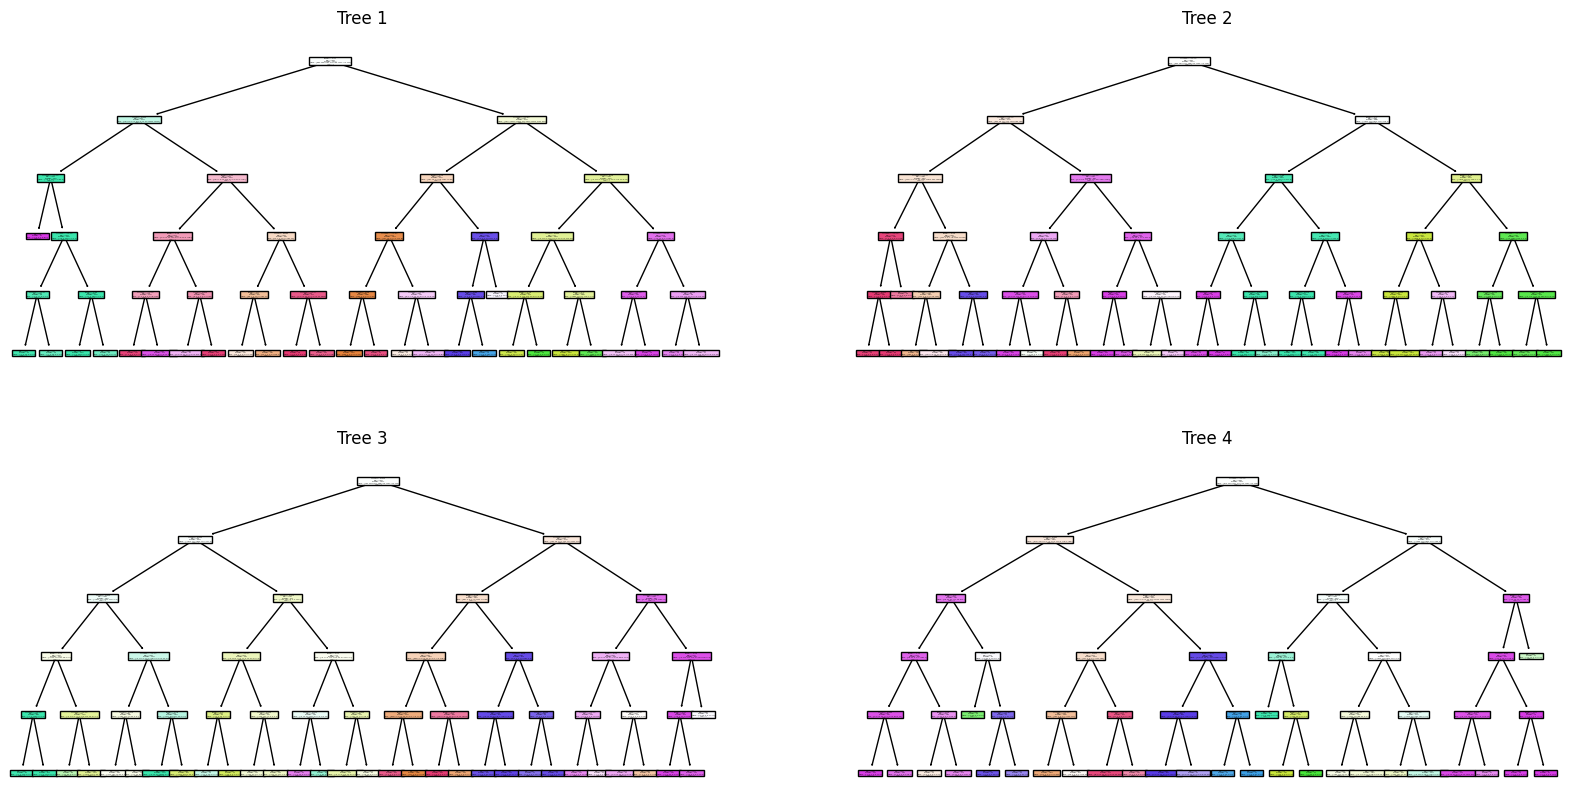

In [25]:
# Crear una figura y subgráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Convertir las etiquetas de clase a cadenas
class_names_str = [str(class_label) for class_label in model_rf.classes_]

# Mostrar los primeros 4 árboles del bosque aleatorio
for i, ax in enumerate(axes.flatten()):
    if i < len(model_rf.estimators_):
        tree.plot_tree(model_rf.estimators_[i], ax=ax, feature_names=X_train.columns, class_names=class_names_str, filled=True)
        ax.set_title(f'Tree {i+1}')

plt.show()